In [63]:
# python 3.10
# source .venv/bin/activate

#tensorflow-gpu==2.10.0
#pandas
#scikit-learn

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer, LSTM
from tensorflow.keras.optimizers import  Adam

from matplotlib import pyplot
from sklearn.svm import LinearSVC

import numpy as np
import pandas as pd

In [65]:
# al leer el csv interpreta seeds como string, puede ser arreglado con converters y pd.eval
# explode separa las listas en varias filas y problema resuelto
# las filas se incrementan a 117825 rows vs 90001 rows original
df = pd.read_csv('muse_v3.csv', converters={'seeds': pd.eval})
#df = df.explode('seeds')

df.head(20)

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,[aggressive],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,[aggressive],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,[aggressive],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"[aggressive, fun, sexy, energetic]",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,[aggressive],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal
5,https://www.last.fm/music/drowning%2bpool/_/st...,Step Up,Drowning Pool,[aggressive],9,2.971389,5.537500,4.726389,49e7b4d2-3772-4301-ba25-3cc46ceb342e,4Q1w4Ryyi8KNxxaFlOQClK,metal
6,https://www.last.fm/music/kanye%2bwest/_/feedback,Feedback,Kanye West,[aggressive],1,3.080000,5.870000,5.490000,NaN,49fT6owWuknekShh9utsjv,hip-hop
7,https://www.last.fm/music/deftones/_/7%2bwords,7 Words,Deftones,"[aggressive, angry]",10,3.807121,5.473939,4.729091,1a826083-5585-445f-a708-415dc90aa050,6DoXuH326aAYEN8CnlLmhP,nu metal
8,https://www.last.fm/music/fiona%2bapple/_/limp,Limp,Fiona Apple,"[aggressive, angry, bitter]",20,3.737211,5.610204,4.626735,4435982c-b83e-4daa-af2b-9f3430036bb7,104YdibC7VQy78xAVmgRYr,singer-songwriter
9,https://www.last.fm/music/metallica/_/sweet%2b...,Sweet Amber,Metallica,[aggressive],4,3.582759,5.757241,5.340000,fe1cc051-faa7-4953-b331-f6196cd3ddae,5fU6qjmD38P90BMsuqpiuU,metal


In [66]:
# solo deja en el dataframe los elementos con 1 seed
# mas seeds meten ruido
df = df[df['seeds'].map(len) == 1]

# solo deja el elemento 0 de seeds
df['seeds'] = df['seeds'].map(lambda x: x[0])

In [67]:
# Mostrar la frecuencia de los datos en la columna 'seeds'
frecuencia_seeds = df['seeds'].apply(str).value_counts()

# Imprimir los resultados
print(frecuencia_seeds)


seeds
sleazy         938
lazy           835
martial        799
exotic         799
fierce         792
              ... 
outraged         1
virile           1
motoric          1
hymn-like        1
translucent      1
Name: count, Length: 271, dtype: int64


In [68]:
df.drop(['lastfm_url', 'mbid', 'spotify_id','track','number_of_emotion_tags'], axis=1, inplace=True)
df.dropna(inplace=True)
df


,artist,seeds,valence_tags,arousal_tags,dominance_tags,genre
0,Eminem,aggressive,4.550000,5.273125,5.690625,rap
1,Metallica,aggressive,3.710000,5.833000,5.427250,metal
2,Rick Ross,aggressive,3.080000,5.870000,5.490000,rap
4,Dope,aggressive,3.771176,5.348235,5.441765,metal
5,Drowning Pool,aggressive,2.971389,5.537500,4.726389,metal
...,...,...,...,...,...,...
89993,Ethereal Universe,transparent,5.370000,3.450000,5.330000,ambient
89994,Diana Ross,transparent,5.760000,3.875000,5.005000,pop
89995,重松俊一,transparent,5.370000,3.450000,5.330000,video game music
89997,Omar Rodriguez-Lopez,transparent,5.797887,4.132254,5.570563,progressive rock


In [69]:
print(df['genre'].unique())

['rap' 'metal' 'hip-hop' 'punk' 'metalcore' 'classic rock' 'rock'
 'post-hardcore' 'progressive metal' 'nu metal' 'alternative metal' 'pop'
 'thrash metal' 'soundtrack' 'industrial metal' 'post-punk' 'gothic metal'
 'death metal' 'alternative rock' 'screamo' 'electronic' 'riot grrrl'
 'symphonic metal' 'grunge' 'trip-hop' 'hard rock' 'breakbeat'
 'melodic death metal' 'hardcore' 'alternative' 'industrial' 'country'
 'indie' 'underground hip hop' 'horrorcore' 'black metal' 'dark electro'
 'redneck' 'hardcore punk' 'hip hop' 'math rock' 'deathcore' 'stoner rock'
 'russian chanson' 'j-rock' 'post-metal' 'goth' 'bluegrass' 'british'
 'christian metal' 'soul' 'experimental' 'industrial rock' 'doom metal'
 'grindcore' 'k-pop' 'digital hardcore' 'jazz' 'visual kei' 'electro'
 'german' 'mathcore' 'folk metal' 'emo' 'noise rock' 'blues rock'
 'minimal techno' 'new wave' 'dance' 'ebm' 'pop punk' 'idm' 'indie rock'
 'groove metal' 'christian rock' 'funk' 'crust punk' 'stoner metal'
 'acoustic' 'b

In [70]:
df['genre'].value_counts()

genre
indie              4970
rock               4669
electronic         4343
pop                3859
ambient            2056
                   ... 
orthodox chant        1
navajo                1
russian chanson       1
idol                  1
disco house           1
Name: count, Length: 775, dtype: int64

In [71]:
#obtiene la frecuencia de cada genero y su media
frecuencia_genero = df['genre'].value_counts()

#imprime los resultados
print(frecuencia_genero)

genre
indie              4970
rock               4669
electronic         4343
pop                3859
ambient            2056
                   ... 
orthodox chant        1
navajo                1
russian chanson       1
idol                  1
disco house           1
Name: count, Length: 775, dtype: int64


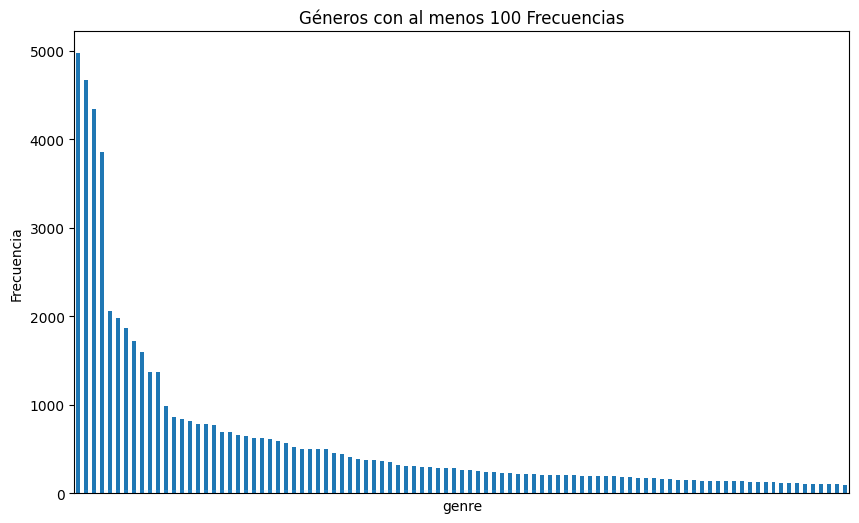

El género menos frecuente entre los seleccionados es "nu jazz" con 101 frecuencias.
Número de géneros con al menos 100 frecuencias: 97


In [72]:

# Obtener la frecuencia de los géneros
frecuencia_generos = df['genre'].value_counts()

# Seleccionar los géneros que tienen al menos 100 frecuencias
generos_minimo_100_frecuencias = frecuencia_generos[frecuencia_generos >= 100]

# Graficar la frecuencia de los géneros
plt.figure(figsize=(10, 6))
generos_minimo_100_frecuencias.plot(kind='bar')
plt.title(f'Géneros con al menos 100 Frecuencias')
plt.ylabel('Frecuencia')

# Ocultar las etiquetas del eje x
plt.xticks([])

plt.show()

# Encontrar y mostrar el género menos frecuente entre los seleccionados
genero_menos_frecuente = generos_minimo_100_frecuencias.idxmin()
frecuencia_menos_frecuente = generos_minimo_100_frecuencias.min()
print(f'El género menos frecuente entre los seleccionados es "{genero_menos_frecuente}" con {frecuencia_menos_frecuente} frecuencias.')

# Mostrar la cantidad de géneros seleccionados
print(f'Número de géneros con al menos 100 frecuencias: {len(generos_minimo_100_frecuencias)}')


In [73]:
conteo_generos = df['genre'].value_counts()

# Filtrar solo los géneros con 1000 o más entradas
generos_mayor_100 = conteo_generos[conteo_generos >= 100]

# Obtener el número mínimo de entradas entre los géneros seleccionados
min_entradas = generos_mayor_100.min()

# Filtrar el DataFrame original para incluir solo los géneros seleccionados
df_filtrado = df[df['genre'].isin(generos_mayor_100.index)]

# Ajustar la cantidad de entradas para que todos los géneros tengan la misma cantidad
df_ajustado = df_filtrado.groupby('genre').apply(lambda x: x.sample(min_entradas)).reset_index(drop=True)

# Verificar el nuevo conteo de entradas por género
print(df_ajustado['genre'].value_counts())

genre
world                101
sad                  101
shoegaze             101
singer-songwriter    101
ska                  101
                    ... 
anime                101
avant-garde          101
black metal          101
blues                101
british              101
Name: count, Length: 97, dtype: int64


In [74]:
#resetea el indice
df_ajustado.reset_index(drop=True, inplace=True)
df_ajustado


,artist,seeds,valence_tags,arousal_tags,dominance_tags,genre
0,José González,mellow,6.587164,3.852537,6.362090,acoustic
1,Dave Matthews and Tim Reynolds,cathartic,3.974574,2.163101,3.912403,acoustic
2,Neil Halstead,quiet,6.322000,3.620000,5.662000,acoustic
3,Suzanne Vega,powerful,5.740725,3.843623,5.335942,acoustic
4,Trippy Wicked & the Cosmic Children of the Knight,bleak,2.566667,2.436667,2.603333,acoustic
...,...,...,...,...,...,...
9792,Kalahari Surfers,exotic,7.550000,6.900000,5.650000,world
9793,Ishta,mystical,5.041683,4.045248,4.694257,world
9794,Renato Ventura,philosophical,6.210000,3.500000,5.390000,world
9795,Issa Bagayogo,exotic,7.550000,6.900000,5.650000,world


In [75]:
a = df_ajustado[['valence_tags','arousal_tags', 'dominance_tags','genre']].sort_values(by=['valence_tags']).head(500)
print(a.to_string())
df_ajustado.to_csv('df_ajustado.csv', index=False)

      valence_tags  arousal_tags  dominance_tags               genre
2535      0.472294      0.337706        0.421927           dream pop
6585      0.567460      1.310317        0.608730               noise
7696      0.570000      1.290000        1.130769                punk
6410      0.623571      0.516429        0.675000             new age
2348      0.639737      0.706447        0.677368          doom metal
1091      0.715714      0.301071        0.750000              celtic
6918      0.787500      0.830000        0.787500                 pop
2557      0.795745      0.878723        0.842553           dream pop
8372      0.845000      0.604205        0.754886            shoegaze
523       0.862687      1.413284        0.992090         avant-garde
2552      0.864828      0.518966        0.825517           dream pop
7462      0.865079      0.707143        0.865873    progressive rock
6871      0.880000      2.156522        1.429565                 pop
7482      0.911304      0.695652  

In [76]:
from sklearn import preprocessing
#pasa todas las columnas a numeros
# df_ajustado = df_ajustado.drop(['seeds', 'artist', 'number_of_emotion_tags'], axis=1).reset_index(drop=True)
df_ajustado = df_ajustado.drop(['artist'], axis=1).reset_index(drop=True)

In [77]:

le = preprocessing.LabelEncoder()
# for column in df_ajustado.columns:
#     df_ajustado[column] = le.fit_transform(df_ajustado[column])
# df_ajustado['seeds'] = le.fit_transform(df_ajustado['seeds'])
df_ajustado

,seeds,valence_tags,arousal_tags,dominance_tags,genre
0,mellow,6.587164,3.852537,6.362090,acoustic
1,cathartic,3.974574,2.163101,3.912403,acoustic
2,quiet,6.322000,3.620000,5.662000,acoustic
3,powerful,5.740725,3.843623,5.335942,acoustic
4,bleak,2.566667,2.436667,2.603333,acoustic
...,...,...,...,...,...
9792,exotic,7.550000,6.900000,5.650000,world
9793,mystical,5.041683,4.045248,4.694257,world
9794,philosophical,6.210000,3.500000,5.390000,world
9795,exotic,7.550000,6.900000,5.650000,world


In [78]:
df_ajustado['genre'] = le.fit_transform(df_ajustado['genre'])
df_ajustado['seeds'] = le.fit_transform(df_ajustado['seeds'])


In [79]:
#datos todas las columnas menos valence_tags
def get_datos(categoria):
    scaler = preprocessing.StandardScaler()
    etiquetas = df_ajustado[categoria]
    datos = df_ajustado.drop([categoria], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(datos, etiquetas, train_size=0.8, shuffle=True)
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Convertir las etiquetas a one-hot encoding
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    return x_train, x_test, y_train, y_test



In [ ]:
from keras.optimizers import SGD

def get_moddelo(x_train, x_test, y_train, y_test):
    # Crear el modelo
    num_epochs = 2000
    learning_rate = 5e-3
    model = Sequential()
    model.add(InputLayer(input_shape=(x_train.shape[1],)))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(y_train.shape[1], activation='softmax'))
    #model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=learning_rate, momentum=0.8),metrics=['accuracy'])
    model_fit = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test), batch_size=32)
    return model, model_fit

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier


In [82]:
def decision_tree(x_train, x_test, y_train, y_test):
    model = DecisionTreeClassifier()
    model = model.fit(x_train, y_train)
    return model.score(x_test, y_test)
    

def random_forest(x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=256)
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [83]:
def mostrar_graficos(model, model_fit, x_test, y_test):
    #epoch - perdida
    plt.figure()
    plt.plot(model_fit.epoch, model_fit.history['loss'])
    plt.xlabel("Perdida")
    plt.ylabel("Epoch")
    plt.title("Entrenamiento")
    plt.show()

    #epoch - acierto
    plt.figure()
    plt.plot(model_fit.epoch, model_fit.history['accuracy'])
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.title("Entrenamiento")
    plt.show()

    #imprime matriz confusion
    # y_pred = model.predict(x_test)
    # y_pred = np.argmax(y_pred, axis=1)
    # y_test = np.argmax(y_test, axis=1)
    # cm = confusion_matrix(y_test, y_pred)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    # disp.plot()

# #ver que pasa con cm


In [84]:
# x_train, x_test, y_train, y_test = get_datos("genre")
# genre_model, genre_model_fit = get_moddelo(x_train, x_test, y_train, y_test)


In [85]:
# print(f'{genre_model.evaluate(x_test, y_test)=}')
# print(f'{decision_tree(x_train, x_test, y_train, y_test)=}')
# print(f'{random_forest(x_train, x_test, y_train, y_test)=}')

In [86]:
# mostrar_graficos(genre_model, genre_model_fit, x_test, y_test)

In [94]:
x_train, x_test, y_train, y_test = get_datos("dominance_tags")
dominance_tags_model, dominance_tags_model_fit = get_moddelo(x_train, x_test, y_train, y_test)

Epoch 1/2000
245/245 [==============================] - 0s 959us/step - loss: 1.8584 - accuracy: 0.2905 - val_loss: 1.6174 - val_accuracy: 0.3765
Epoch 2/2000
245/245 [==============================] - 0s 657us/step - loss: 1.5405 - accuracy: 0.3683 - val_loss: 1.3824 - val_accuracy: 0.4582
Epoch 3/2000
245/245 [==============================] - 0s 659us/step - loss: 1.3835 - accuracy: 0.4281 - val_loss: 1.2522 - val_accuracy: 0.4852
Epoch 4/2000
245/245 [==============================] - 0s 669us/step - loss: 1.3001 - accuracy: 0.4629 - val_loss: 1.1787 - val_accuracy: 0.5240
Epoch 5/2000
245/245 [==============================] - 0s 718us/step - loss: 1.2489 - accuracy: 0.4662 - val_loss: 1.1360 - val_accuracy: 0.5296
Epoch 6/2000
245/245 [==============================] - 0s 656us/step - loss: 1.2133 - accuracy: 0.4841 - val_loss: 1.1025 - val_accuracy: 0.5286
Epoch 7/2000
245/245 [==============================] - 0s 670us/step - loss: 1.1909 - accuracy: 0.4899 - val_loss: 1.0772 -

KeyboardInterrupt: 

In [ ]:
print(f'{dominance_tags_model.evaluate(x_test, y_test)=}')
print(f'{decision_tree(x_train, x_test, y_train, y_test)=}')
print(f'{random_forest(x_train, x_test, y_train, y_test)=}')

In [ ]:
mostrar_graficos(dominance_tags_model, dominance_tags_model_fit, x_test, y_test)

In [ ]:
x_train, x_test, y_train, y_test = get_datos("arousal_tags")
arousal_tags_model, arousal_tags_model_fit = get_moddelo(x_train, x_test, y_train, y_test)

In [ ]:
print(f'{dominance_tags_model.evaluate(x_test, y_test)=}')
print(f'{decision_tree(dominance_tags_model, x_train, x_test, y_train, y_test)=}')
print(f'{random_forest(dominance_tags_model, x_train, x_test, y_train, y_test)=}')

In [ ]:
mostrar_graficos(arousal_tags_model, arousal_tags_model_fit, x_test, y_test)

In [ ]:
x_train, x_test, y_train, y_test = get_datos("valence_tags")
valence_tags_model, valence_tags_model_fit = get_moddelo(x_train, x_test, y_train, y_test)

In [ ]:
print(f'{dominance_tags_model.evaluate(x_test, y_test)=}')
print(f'{decision_tree(dominance_tags_model, x_train, x_test, y_train, y_test)=}')
print(f'{random_forest(dominance_tags_model, x_train, x_test, y_train, y_test)=}')

In [ ]:
mostrar_graficos(valence_tags_model, valence_tags_model_fit, x_test, y_test)